In [1]:
#匯入模組
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#讀取mnist手寫資料
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [3]:
#將features(數字影像特徵)轉換為一維陣列
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test = x_test_image.reshape(10000,784).astype('float32')

In [4]:
#將影像特徵值標準化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [5]:
#one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [6]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense
#加入dropout模組
from keras.layers import Dropout

In [7]:
#建立線性堆疊模型
model = Sequential()

In [8]:
#建立輸入層與隱藏層
#Dense神經網路層好處:上一層與下一層的神經元，完全連結
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [9]:
model.add(Dropout(0.5))#在隱藏層中隨機放棄50%神經元

In [10]:
#softmax 將神經元的輸出，轉換為預測每一個數字的機率
#輸出層不需要建立input _dim因為keras會自動依照上一層的units建立
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#訓練模型
#透過compile方法，對模型進行設定
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss(loss function):usually use cross_entropy，the result is better than others
#optimizer:深度學習使用adam最優化方法，讓訓練更快收斂，提高準確率
#metrics:設定評估模型方式-accuracy

In [13]:
train_history = model.fit(x=x_train_normalize,
                          y=y_train_onehot,
                          validation_split = 0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

#accuracy與 val_accuracy差距變小代表有改善overfitting

Epoch 1/10
240/240 - 2s - accuracy: 0.8935 - loss: 0.3566 - val_accuracy: 0.9553 - val_loss: 0.1650
Epoch 2/10
240/240 - 2s - accuracy: 0.9522 - loss: 0.1599 - val_accuracy: 0.9663 - val_loss: 0.1173
Epoch 3/10
240/240 - 2s - accuracy: 0.9658 - loss: 0.1148 - val_accuracy: 0.9704 - val_loss: 0.0984
Epoch 4/10
240/240 - 2s - accuracy: 0.9732 - loss: 0.0907 - val_accuracy: 0.9728 - val_loss: 0.0854
Epoch 5/10
240/240 - 2s - accuracy: 0.9765 - loss: 0.0766 - val_accuracy: 0.9745 - val_loss: 0.0806
Epoch 6/10
240/240 - 2s - accuracy: 0.9812 - loss: 0.0634 - val_accuracy: 0.9754 - val_loss: 0.0761
Epoch 7/10
240/240 - 2s - accuracy: 0.9840 - loss: 0.0548 - val_accuracy: 0.9785 - val_loss: 0.0689
Epoch 8/10
240/240 - 2s - accuracy: 0.9858 - loss: 0.0468 - val_accuracy: 0.9803 - val_loss: 0.0696
Epoch 9/10
240/240 - 2s - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9783 - val_loss: 0.0700
Epoch 10/10
240/240 - 2s - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9806 - val_loss: 0.0678

In [14]:
#顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

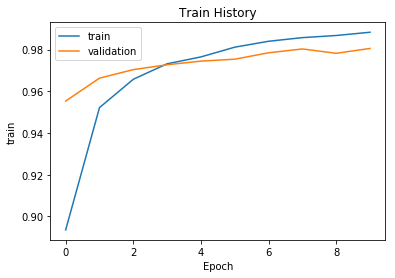

In [15]:
show_train_history(train_history,'accuracy','val_accuracy')
#overfitting問題更嚴重，可以透過加入dropout來解決這個問題
#dropout功能是每次訓練迭代時，會隨機地在隱藏層中放棄50%的神經元來避免overfitting

In [16]:
#模型準確率
scores = model.evaluate(x_test_normalize,y_test_onehot)
print('accuracy',scores[1])

313/313 [==============================] - 1s 3ms/step - accuracy: 0.9819 - loss: 0.0600
accuracy 0.9818999767303467
